In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
!pip install category_encoders

In [ ]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from category_encoders import BinaryEncoder
from keras.optimizers import Adam, SGD
from sklearn.model_selection import GridSearchCV

In [ ]:
dataset = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/Dataset/watershed_variables.csv')

In [ ]:
dataset.head(5)

,HUC8,year,month,mean.gw.nit,Lagged_spi1,previous_winter_spi1,previous_winter_spi12,Slope..Mean.Value.in.HUC8.Watershed,Elevation..Mean.Value.in.HUC8.Watershed,Mean.Annual.Precipitation..1981.2010..in.Watershed,Soil.Stability..Mean.in.WS,X..Urban.in.WS..2016.,X..Agriculture.in.WS..2016.,X..Cultivated.Crops.in.WS..2016.,X..Agriculture.on...20..Slope.in.WS..2016.,X..Slope.of.Cropland..Mean.in.WS..2016.,X..Cropland.on...10..Slope.in.WS..2016.,X..Imperviousness..Mean.in.WS..2016.,Population.Density.in.WS,Synthetic.N.Fertilizer.Application.in.WS
0,10120108,2008,8,2.5,1.248004,0.092629,-1.094489,3.547139,3973.296873,16.777329,0.649955,0.174075,3.171821,0.260322,0.001113,1.700216,0.001364,0.123372,0.101141,0.979780
1,10120108,2006,5,0.8,0.457543,-0.313392,0.522612,3.547139,3973.296873,16.777329,0.649955,0.174075,3.171821,0.260322,0.001113,1.700216,0.001364,0.123372,0.101141,0.979780
2,10140201,2011,7,0.7,0.826665,0.342016,0.488624,4.868658,3397.796171,18.074452,0.627527,1.110585,7.241330,3.257066,0.001781,1.667374,0.041926,0.292019,2.472286,2.240497
3,10140201,2011,8,2.1,1.047535,0.342016,0.488624,4.868658,3397.796171,18.074452,0.627527,1.110585,7.241330,3.257066,0.001781,1.667374,0.041926,0.292019,2.472286,2.240497
4,10140201,2009,8,0.4,0.264305,-0.312704,0.277101,4.868658,3397.796171,18.074452,0.627527,1.110585,7.241330,3.257066,0.001781,1.667374,0.041926,0.292019,2.472286,2.240497


In [ ]:
print(len(dataset))
print(f"Unique number of HUC8 values is : {len(dataset['HUC8'].unique())}")
print(f"Unique number of year values is : {len(dataset['year'].unique())}")

4419
Unique number of HUC8 values is : 62
Unique number of year values is : 29


In [ ]:
dataset.columns ## Here, HUC8, year, and month are considered to be categorical values

Index(['HUC8', 'year', 'month', 'mean.gw.nit', 'Lagged_spi1',
       'previous_winter_spi1', 'previous_winter_spi12',
       'Slope..Mean.Value.in.HUC8.Watershed',
       'Elevation..Mean.Value.in.HUC8.Watershed',
       'Mean.Annual.Precipitation..1981.2010..in.Watershed',
       'Soil.Stability..Mean.in.WS', 'X..Urban.in.WS..2016.',
       'X..Agriculture.in.WS..2016.', 'X..Cultivated.Crops.in.WS..2016.',
       'X..Agriculture.on...20..Slope.in.WS..2016.',
       'X..Slope.of.Cropland..Mean.in.WS..2016.',
       'X..Cropland.on...10..Slope.in.WS..2016.',
       'X..Imperviousness..Mean.in.WS..2016.', 'Population.Density.in.WS',
       'Synthetic.N.Fertilizer.Application.in.WS'],
      dtype='object')

In [ ]:
dataset.isnull().sum() ##Checking the null value

,0
HUC8,0
year,0
month,0
mean.gw.nit,0
Lagged_spi1,0
previous_winter_spi1,0
previous_winter_spi12,0
Slope..Mean.Value.in.HUC8.Watershed,0
Elevation..Mean.Value.in.HUC8.Watershed,0
Mean.Annual.Precipitation..1981.2010..in.Watershed,0


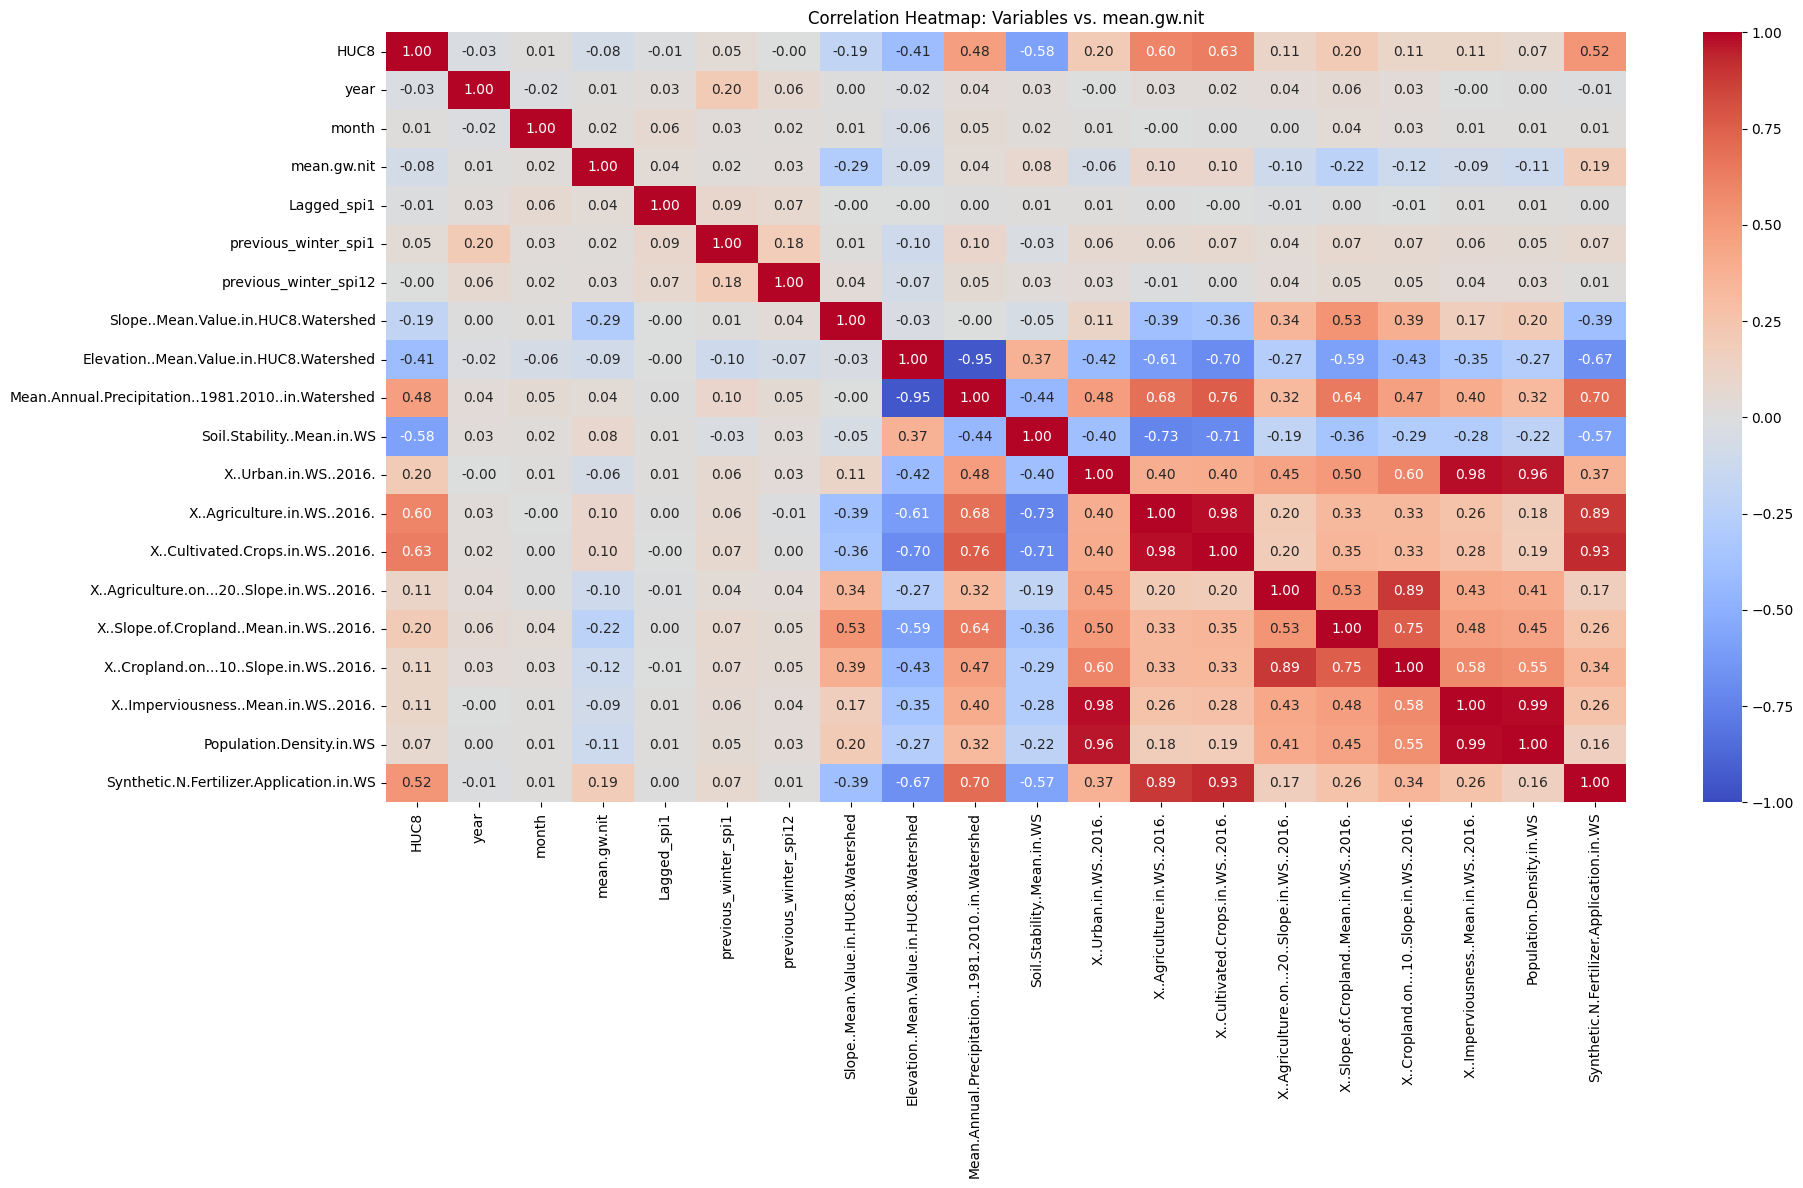

In [ ]:
# Compute correlation matrix
corr_matrix = dataset.corr(method='pearson')

# Plot heatmap
plt.figure(figsize=(20, 10))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', vmin=-1, vmax=1, fmt=".2f")
plt.title("Correlation Heatmap: Variables vs. mean.gw.nit")
plt.show()

In [ ]:
X = dataset.drop('mean.gw.nit', axis = 1)
Y = dataset['mean.gw.nit']

In [ ]:
X.dtypes == object ##Checking whether we need categorical encoding or not.

,0
HUC8,False
year,False
month,False
Lagged_spi1,False
previous_winter_spi1,False
previous_winter_spi12,False
Slope..Mean.Value.in.HUC8.Watershed,False
Elevation..Mean.Value.in.HUC8.Watershed,False
Mean.Annual.Precipitation..1981.2010..in.Watershed,False
Soil.Stability..Mean.in.WS,False


In [ ]:
# Apply Binary Encoding to 'HUC8','year'
encoder = BinaryEncoder(cols=["HUC8","year"], drop_invariant=True)
X = encoder.fit_transform(X)

# Display the first few rows of the processed dataset
print(X.head())

   HUC8_0  HUC8_1  HUC8_2  HUC8_3  HUC8_4  HUC8_5  year_0  year_1  year_2  \
0       0       0       0       0       0       1       0       0       0   
1       0       0       0       0       0       1       0       0       0   
2       0       0       0       0       1       0       0       0       0   
3       0       0       0       0       1       0       0       0       0   
4       0       0       0       0       1       0       0       0       1   

   year_3  ...  Soil.Stability..Mean.in.WS  X..Urban.in.WS..2016.  \
0       0  ...                    0.649955               0.174075   
1       1  ...                    0.649955               0.174075   
2       1  ...                    0.627527               1.110585   
3       1  ...                    0.627527               1.110585   
4       0  ...                    0.627527               1.110585   

   X..Agriculture.in.WS..2016.  X..Cultivated.Crops.in.WS..2016.  \
0                     3.171821                        

In [ ]:
## Since the month is cyclic, so applying cycling encoding.
X["month_sin"] = np.sin(2 * np.pi * X["month"] / 12)
X["month_cos"] = np.cos(2 * np.pi * X["month"] / 12)
X.drop(columns=["month"], inplace=True)
X.head()

,HUC8_0,HUC8_1,HUC8_2,HUC8_3,HUC8_4,HUC8_5,year_0,year_1,year_2,year_3,...,X..Agriculture.in.WS..2016.,X..Cultivated.Crops.in.WS..2016.,X..Agriculture.on...20..Slope.in.WS..2016.,X..Slope.of.Cropland..Mean.in.WS..2016.,X..Cropland.on...10..Slope.in.WS..2016.,X..Imperviousness..Mean.in.WS..2016.,Population.Density.in.WS,Synthetic.N.Fertilizer.Application.in.WS,month_sin,month_cos
0,0,0,0,0,0,1,0,0,0,0,...,3.171821,0.260322,0.001113,1.700216,0.001364,0.123372,0.101141,0.979780,-0.866025,-0.500000
1,0,0,0,0,0,1,0,0,0,1,...,3.171821,0.260322,0.001113,1.700216,0.001364,0.123372,0.101141,0.979780,0.500000,-0.866025
2,0,0,0,0,1,0,0,0,0,1,...,7.241330,3.257066,0.001781,1.667374,0.041926,0.292019,2.472286,2.240497,-0.500000,-0.866025
3,0,0,0,0,1,0,0,0,0,1,...,7.241330,3.257066,0.001781,1.667374,0.041926,0.292019,2.472286,2.240497,-0.866025,-0.500000
4,0,0,0,0,1,0,0,0,1,0,...,7.241330,3.257066,0.001781,1.667374,0.041926,0.292019,2.472286,2.240497,-0.866025,-0.500000


In [ ]:
X.columns

Index(['HUC8_0', 'HUC8_1', 'HUC8_2', 'HUC8_3', 'HUC8_4', 'HUC8_5', 'year_0',
       'year_1', 'year_2', 'year_3', 'year_4', 'Lagged_spi1',
       'previous_winter_spi1', 'previous_winter_spi12',
       'Slope..Mean.Value.in.HUC8.Watershed',
       'Elevation..Mean.Value.in.HUC8.Watershed',
       'Mean.Annual.Precipitation..1981.2010..in.Watershed',
       'Soil.Stability..Mean.in.WS', 'X..Urban.in.WS..2016.',
       'X..Agriculture.in.WS..2016.', 'X..Cultivated.Crops.in.WS..2016.',
       'X..Agriculture.on...20..Slope.in.WS..2016.',
       'X..Slope.of.Cropland..Mean.in.WS..2016.',
       'X..Cropland.on...10..Slope.in.WS..2016.',
       'X..Imperviousness..Mean.in.WS..2016.', 'Population.Density.in.WS',
       'Synthetic.N.Fertilizer.Application.in.WS', 'month_sin', 'month_cos'],
      dtype='object')

In [ ]:
# X.to_csv('X.csv')
# Y.to_csv('y.csv')

In [ ]:
#Split dataset into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.2, random_state=42)

In [ ]:
#Feature Scaling -- for better training
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.fit_transform(X_test)

In [ ]:
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.svm import SVR
models = {
    'Linear Regression': LinearRegression(),
    'Ridge Regression': Ridge(alpha=1.0),
    'Lasso Regression': Lasso(alpha=0.1),
    'Random Forest': RandomForestRegressor(n_estimators=100, random_state=42),
    'Gradient Boosting': GradientBoostingRegressor(random_state=42),
    'SVR': SVR(kernel='rbf', C=1.0, gamma='scale')
}

In [ ]:
def evaluate_models(models, X_train, X_test, y_train, y_test):
    results = []
    for name, model in models.items():
        model.fit(X_train, y_train)
        y_pred = model.predict(X_test)
        rmse = np.sqrt(mean_squared_error(y_test, y_pred))
        mae = mean_absolute_error(y_test, y_pred)
        r2 = r2_score(y_test, y_pred)
        results.append([name, rmse, mae, r2])
    return pd.DataFrame(results, columns=['Model', 'RMSE', 'MAE', 'R²'])

In [ ]:
evaluate_models(models, X_train_scaled, X_test_scaled, y_train, y_test)

,Model,RMSE,MAE,R²
0,Linear Regression,5.511475,3.708649,0.274369
1,Ridge Regression,5.509438,3.714814,0.274905
2,Lasso Regression,5.648501,3.861923,0.237839
3,Random Forest,5.243332,3.307105,0.343257
4,Gradient Boosting,5.291282,3.389767,0.331191
5,SVR,5.290570,3.209543,0.331371


In general, we can see Random Forest have less root mean square error as comparing to other methods, Now finetuning this Random Forest model

In [ ]:
model = RandomForestRegressor(n_estimators=100, random_state=42)
model.fit(X_train_scaled, y_train)
y_pred = model.predict(X_test_scaled)
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
print(f"Mean Absolute Error (MAE): {mae}")
print(f"Root Mean Squared Error (MSE): {rmse}")
print(f"R² Score: {r2}")

Mean Absolute Error (MAE): 3.3071049165450117
Root Mean Squared Error (MSE): 5.243332290346212
R² Score: 0.34325742341987464


In [ ]:
#Predict on test data
predictions = model.predict(X_test_scaled[:5])
print("Predicted values are: ", predictions)
print("Real values are: ", y_test[:5])

Predicted values are:  [5.54553403 9.12756794 5.25010572 5.0862973  6.58081572]
Real values are:  1042     4.766667
1272    11.821429
1918     7.541176
1896     3.096053
4066     5.750000
Name: mean.gw.nit, dtype: float64


In [ ]:
#Feature ranking...
feature_list = list(X.columns)
feature_imp = pd.Series(model.feature_importances_, index=feature_list).sort_values(ascending=False)
print(feature_imp)

Lagged_spi1                                           0.139242
Slope..Mean.Value.in.HUC8.Watershed                   0.122857
month_cos                                             0.100730
previous_winter_spi1                                  0.093853
previous_winter_spi12                                 0.093180
X..Slope.of.Cropland..Mean.in.WS..2016.               0.076145
Synthetic.N.Fertilizer.Application.in.WS              0.070417
month_sin                                             0.055533
Mean.Annual.Precipitation..1981.2010..in.Watershed    0.040865
Elevation..Mean.Value.in.HUC8.Watershed               0.031576
Soil.Stability..Mean.in.WS                            0.017439
X..Cultivated.Crops.in.WS..2016.                      0.016196
X..Urban.in.WS..2016.                                 0.014650
X..Imperviousness..Mean.in.WS..2016.                  0.014124
year_4                                                0.013036
year_2                                                0

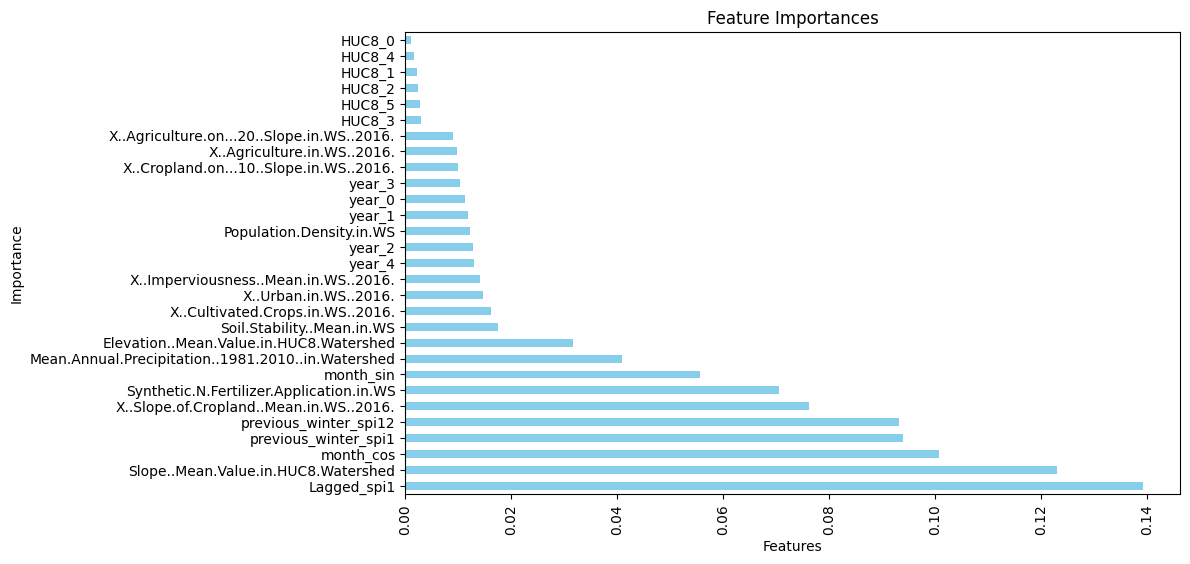

In [ ]:
#Visualizing it
import matplotlib.pyplot as plt
import pandas as pd

# Plotting the feature importances
plt.figure(figsize=(10, 6))  # Set the figure size
feature_imp.plot(kind='barh', color='skyblue')  # Create a vertical bar chart
plt.title('Feature Importances')  # Title of the plot
plt.xlabel('Features')  # Label for the x-axis
plt.ylabel('Importance')  # Label for the y-axis
plt.xticks(rotation=90)  # Rotate the x-axis labels for better readability
plt.show()


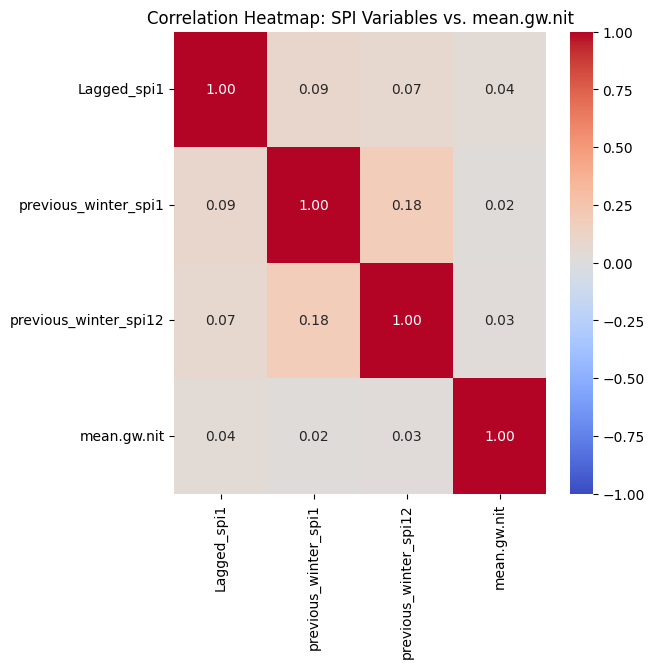

In [ ]:
# Columns used for finding co-relations
spi_columns = ['Lagged_spi1', 'previous_winter_spi1', 'previous_winter_spi12', 'mean.gw.nit']
spi_data = dataset[spi_columns]

# Compute correlation matrix
corr_matrix = spi_data.corr(method='pearson')

# Plot heatmap
plt.figure(figsize=(6, 6))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', vmin=-1, vmax=1, fmt=".2f")
plt.title("Correlation Heatmap: SPI Variables vs. mean.gw.nit")
plt.show()

Using GridCV to tune hyperparameter

In [ ]:
model = RandomForestRegressor(n_estimators=100, random_state=42)

In [ ]:
param_grid = {
    'n_estimators' : [50,100,200],
    'max_depth' : [10,20,30],
    'min_samples_split' : [2,5,10],
    'min_samples_leaf' : [1,2,4]
}

In [ ]:
from sklearn.model_selection import GridSearchCV
model_cv = GridSearchCV(estimator = model, param_grid = param_grid, cv=3, scoring = 'neg_root_mean_squared_error', n_jobs = -1, verbose = 1)

In [ ]:
model_cv.fit(X_train_scaled,y_train)

Fitting 3 folds for each of 81 candidates, totalling 243 fits


GridSearchCV(cv=3, estimator=RandomForestRegressor(random_state=42), n_jobs=-1,
             param_grid={'max_depth': [10, 20, 30],
                         'min_samples_leaf': [1, 2, 4],
                         'min_samples_split': [2, 5, 10],
                         'n_estimators': [50, 100, 200]},
             scoring='neg_root_mean_squared_error', verbose=1)

In [ ]:
# Summarize results
print(f"Best: {model_cv.best_score_} using {model_cv.best_params_}")
y_pred = model_cv.predict(X_test_scaled)
mae = mean_absolute_error(y_test, y_pred)
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
r2 = r2_score(y_test, y_pred)

print(f"Mean Absolute Error (MAE): {mae}")
print(f"Root Mean Squared Error (RMSE): {rmse}")
print(f"R² Score: {r2}")

Best: -5.456779970063109 using {'max_depth': 20, 'min_samples_leaf': 4, 'min_samples_split': 10, 'n_estimators': 200}
Mean Absolute Error (MAE): 3.1706940357575415
Root Mean Squared Error (RMSE): 4.908285272901441
R² Score: 0.4245070575730129


In [ ]:
#Predict on test data
predictions = model_cv.predict(X_test_scaled[:5])
print("Predicted values are: ", predictions)
print("Real values are: ", y_test[:5])


Predicted values are:  [5.72482967 9.7804542  5.64070326 5.06011211 6.13044102]
Real values are:  1042     4.766667
1272    11.821429
1918     7.541176
1896     3.096053
4066     5.750000
Name: mean.gw.nit, dtype: float64


In [ ]:
#Feature ranking...
feature_list = list(X.columns)
feature_imp = pd.Series(model_cv.best_estimator_.feature_importances_, index=feature_list).sort_values(ascending=False)
print(feature_imp)

Slope..Mean.Value.in.HUC8.Watershed                   0.179411
Lagged_spi1                                           0.115974
X..Slope.of.Cropland..Mean.in.WS..2016.               0.106356
month_cos                                             0.103545
previous_winter_spi12                                 0.073373
previous_winter_spi1                                  0.071892
Mean.Annual.Precipitation..1981.2010..in.Watershed    0.056158
Synthetic.N.Fertilizer.Application.in.WS              0.052257
month_sin                                             0.044817
Elevation..Mean.Value.in.HUC8.Watershed               0.038314
Soil.Stability..Mean.in.WS                            0.020805
X..Urban.in.WS..2016.                                 0.016355
X..Cultivated.Crops.in.WS..2016.                      0.013461
Population.Density.in.WS                              0.012952
X..Imperviousness..Mean.in.WS..2016.                  0.012297
year_0                                                0

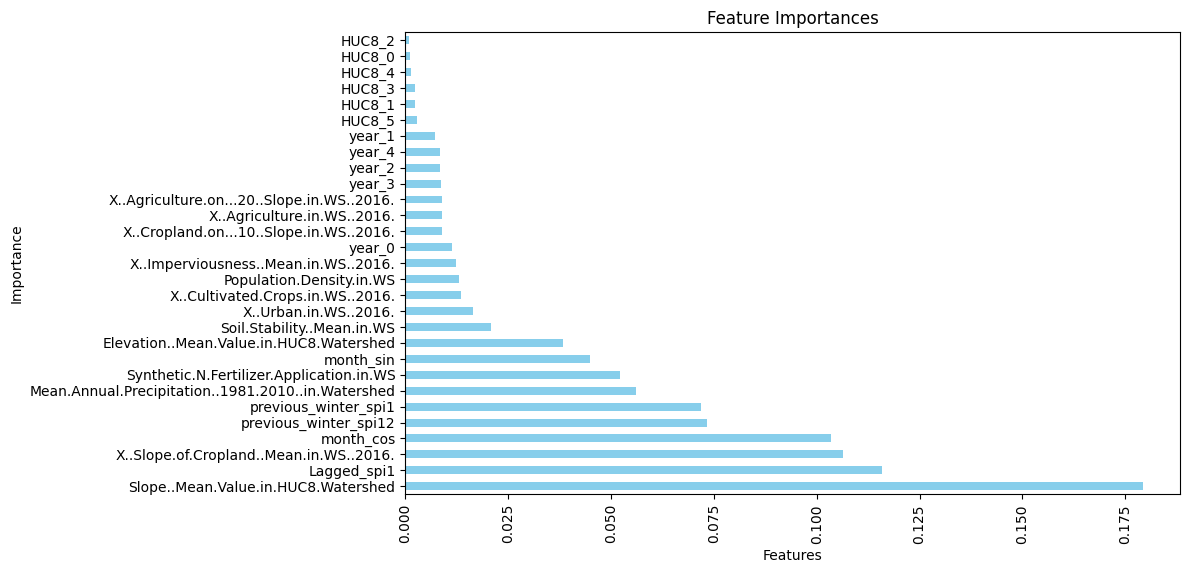

In [ ]:
#Visualizing it
import matplotlib.pyplot as plt
import pandas as pd

# Plotting the feature importances
plt.figure(figsize=(10, 6))  # Set the figure size
feature_imp.plot(kind='barh', color='skyblue')  # Create a vertical bar chart
plt.title('Feature Importances')  # Title of the plot
plt.xlabel('Features')  # Label for the x-axis
plt.ylabel('Importance')  # Label for the y-axis
plt.xticks(rotation=90)  # Rotate the x-axis labels for better readability
plt.show()


# NEURAL NETWORK IMPLEMENTATION

In [ ]:
!pip install -U scikit-learn==1.2.2 scikeras==0.10.0

ERROR: Ignored the following versions that require a different python version: 0.10.0 Requires-Python >=3.7.0,<3.11.0; 0.2.0 Requires-Python >=3.6.7,<3.9; 0.2.1 Requires-Python >=3.6.7,<3.9; 0.6.0 Requires-Python >=3.7.0,<3.10.0; 0.6.1 Requires-Python >=3.7.0,<3.10.0; 0.7.0 Requires-Python >=3.7.0,<3.10.0; 0.8.0 Requires-Python >=3.7.0,<3.11.0; 0.9.0 Requires-Python >=3.7.0,<3.11.0
ERROR: Could not find a version that satisfies the requirement scikeras==0.10.0 (from versions: 0.1.6, 0.1.7, 0.1.8, 0.3.0, 0.3.1, 0.3.3, 0.4.0, 0.4.1, 0.11.0, 0.12.0, 0.13.0)
ERROR: No matching distribution found for scikeras==0.10.0


In [ ]:
##Neural network implementation
from keras.models import Sequential
from keras.layers import Dense, Dropout
from sklearn.model_selection import cross_val_score

In [ ]:
X_train_scaled.shape[1]

29

In [ ]:
def create_model():
    model = Sequential([
      Dense(160, input_dim = X_train_scaled.shape[1], activation='relu'),
      Dropout(0.2),
      Dense(480, activation='relu'),
      Dropout(0.2),
      Dense(256, activation='relu'),
      Dense(1, activation='linear')  # Output layer for binary classification
  ])
    return model

In [ ]:
nn_model = create_model()
nn_model.compile(loss='mean_squared_error', optimizer='adam', metrics=['mse'])
nn_model.summary()

/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense (Dense)                        │ (None, 160)                 │           4,800 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout (Dropout)                    │ (None, 160)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 480)                 │          77,280 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_1 (Dropout)                  │ (None, 480)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2 (Dense)                      │ (None, 256)                 │         123,136 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_3 (Dense)                      │ (None, 1)                   │             257 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 205,473 (802.63 KB)

 Trainable params: 205,473 (802.63 KB)

 Non-trainable params: 0 (0.00 B)

In [ ]:
history = nn_model.fit(X_train_scaled, y_train, validation_split=0.2, epochs =10, batch_size = 64)

Epoch 1/10
45/45 ━━━━━━━━━━━━━━━━━━━━ 4s 21ms/step - loss: 62.0686 - mse: 62.0686 - val_loss: 37.7513 - val_mse: 37.7513
Epoch 2/10
45/45 ━━━━━━━━━━━━━━━━━━━━ 1s 25ms/step - loss: 38.3719 - mse: 38.3719 - val_loss: 35.0394 - val_mse: 35.0394
Epoch 3/10
45/45 ━━━━━━━━━━━━━━━━━━━━ 2s 18ms/step - loss: 31.9006 - mse: 31.9006 - val_loss: 33.2739 - val_mse: 33.2739
Epoch 4/10
45/45 ━━━━━━━━━━━━━━━━━━━━ 1s 16ms/step - loss: 34.1243 - mse: 34.1243 - val_loss: 32.1886 - val_mse: 32.1886
Epoch 5/10
45/45 ━━━━━━━━━━━━━━━━━━━━ 2s 23ms/step - loss: 28.7497 - mse: 28.7497 - val_loss: 31.3051 - val_mse: 31.3051
Epoch 6/10
45/45 ━━━━━━━━━━━━━━━━━━━━ 1s 19ms/step - loss: 23.8212 - mse: 23.8212 - val_loss: 31.8209 - val_mse: 31.8209
Epoch 7/10
45/45 ━━━━━━━━━━━━━━━━━━━━ 1s 23ms/step - loss: 32.1462 - mse: 32.1462 - val_loss: 30.7275 - val_mse: 30.7275
Epoch 8/10
45/45 ━━━━━━━━━━━━━━━━━━━━ 1s 22ms/step - loss: 27.3731 - mse: 27.3731 - val_loss: 31.2177 - val_mse: 31.2177
Epoch 9/10
45/45 ━━━━━━━━━━━━━━━

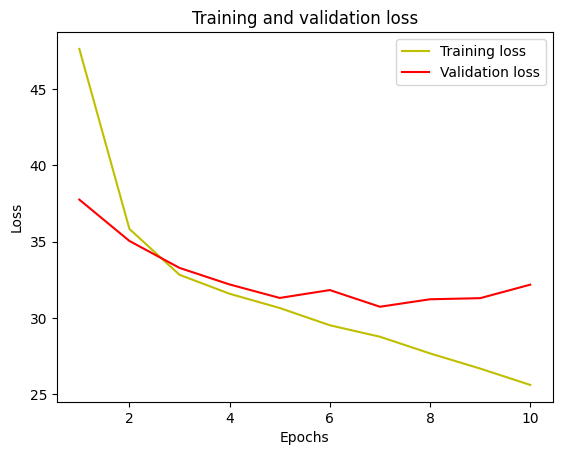

In [ ]:
#plot the training and validation accuracy and loss at each epoch
loss = history.history['loss']
val_loss = history.history['val_loss']
epochs = range(1, len(loss) + 1)
plt.plot(epochs, loss, 'y', label='Training loss')
plt.plot(epochs, val_loss, 'r', label='Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

In [ ]:
#Predict on test data
predictions = nn_model.predict(X_test_scaled[:5])
print("Predicted values are: ", predictions)
print("Real values are: ", y_test[:5])


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 78ms/step
Predicted values are:  [[5.3310914]
 [9.589546 ]
 [4.7331576]
 [3.0478473]
 [4.996184 ]]
Real values are:  1042     4.766667
1272    11.821429
1918     7.541176
1896     3.096053
4066     5.750000
Name: mean.gw.nit, dtype: float64


In [ ]:
mse_neural, mae_neural = nn_model.evaluate(X_test_scaled, y_test)
y_pred = nn_model.predict(X_test_scaled)
r2 = r2_score(y_test, y_pred)
print('Root Mean squared error from neural net: ', np.sqrt(mse_neural))
print('Mean absolute error from neural net: ', mae_neural)
print(f"R² Score: {r2:.4f}")

28/28 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 23.1903 - mse: 23.1903
28/28 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step 
Root Mean squared error from neural net:  5.081405753625998
Mean absolute error from neural net:  25.8206844329834
R² Score: 0.3832


In [ ]:
from sklearn.neural_network import MLPRegressor
mlp_model = MLPRegressor(hidden_layer_sizes=(1000,), max_iter=10, random_state=42, verbose= 2)
mlp_model.fit(X_train_scaled, y_train)


Iteration 1, loss = 39.17245402
Iteration 2, loss = 24.98482097
Iteration 3, loss = 20.22905267
Iteration 4, loss = 18.66072328
Iteration 5, loss = 17.66005848
Iteration 6, loss = 17.03876933
Iteration 7, loss = 16.60906818
Iteration 8, loss = 16.21790308
Iteration 9, loss = 15.88723753
Iteration 10, loss = 15.61932414


/usr/local/lib/python3.11/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (10) reached and the optimization hasn't converged yet.
  warnings.warn(


MLPRegressor(hidden_layer_sizes=(1000,), max_iter=10, random_state=42,
             verbose=2)

In [ ]:
#Predict on test data
predictions = mlp_model.predict(X_test_scaled[:5])
print("Predicted values are: ", predictions)
print("Real values are: ", y_test[:5])

Predicted values are:  [5.80188387 8.75328851 6.06147121 4.64420841 7.3778663 ]
Real values are:  1042     4.766667
1272    11.821429
1918     7.541176
1896     3.096053
4066     5.750000
Name: mean.gw.nit, dtype: float64


In [ ]:
y_pred = mlp_model.predict(X_test_scaled)
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"Mean Absolute Error (MAE): {mae}")
print(f"Root Mean Squared Error (RMSE): {rmse}")
print(f"R² Score: {r2}")

Mean Absolute Error (MAE): 3.5323512454203225
Root Mean Squared Error (RMSE): 5.219434803072453
R² Score: 0.3492302403865818


# XGBOOST

In [ ]:
!pip uninstall -y scikit-learn
!pip install scikit-learn==1.6.1

Found existing installation: scikit-learn 1.3.1
Uninstalling scikit-learn-1.3.1:
  Successfully uninstalled scikit-learn-1.3.1
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.5/13.5 MB 101.6 MB/s eta 0:00:00


In [ ]:
import xgboost as xgb
from sklearn.model_selection import GridSearchCV

In [ ]:
# Define the hyperparameter grid
param_grid = {
    'max_depth': [3, 5, 7],
    'learning_rate': [0.1, 0.01, 0.001],
    'subsample': [0.5, 0.7, 1],
    'n_estimators' : [10, 50, 100]
}

In [ ]:
gradient_boosting_model = GradientBoostingRegressor(random_state=42)

In [ ]:
from sklearn.model_selection import GridSearchCV
model_gb = GridSearchCV(estimator = gradient_boosting_model, param_grid = param_grid, cv=3, scoring = 'neg_root_mean_squared_error', n_jobs = -1, verbose = 2)

In [ ]:
model_gb.fit(X_train_scaled,y_train)

Fitting 3 folds for each of 81 candidates, totalling 243 fits


GridSearchCV(cv=3, estimator=GradientBoostingRegressor(random_state=42),
             n_jobs=-1,
             param_grid={'learning_rate': [0.1, 0.01, 0.001],
                         'max_depth': [3, 5, 7], 'n_estimators': [10, 50, 100],
                         'subsample': [0.5, 0.7, 1]},
             scoring='neg_root_mean_squared_error', verbose=2)

In [ ]:
# Summarize results
print(f"Best: {model_gb.best_score_} using {model_gb.best_params_}")
y_pred = model_gb.predict(X_test_scaled)
mae = mean_absolute_error(y_test, y_pred)
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
r2 = r2_score(y_test, y_pred)
print(f"Mean Absolute Error (MAE): {mae}")
print(f"Root Mean Squared Error (RMSE): {rmse}")
print(f"R² Score: {r2}")


Best: -5.669294877519281 using {'learning_rate': 0.1, 'max_depth': 3, 'n_estimators': 50, 'subsample': 1}
Mean Absolute Error (MAE): 3.4107289254217354
Root Mean Squared Error (RMSE): 5.1617178445870975
R² Score: 0.36354319926440604


In [ ]:
#Predict on test data
predictions = model_gb.predict(X_test_scaled[:5])
print("Predicted values are: ", predictions)
print("Real values are: ", y_test[:5])


Predicted values are:  [6.71374484 9.90002213 5.3649723  5.09090717 6.72188165]
Real values are:  1042     4.766667
1272    11.821429
1918     7.541176
1896     3.096053
4066     5.750000
Name: mean.gw.nit, dtype: float64


In [ ]:

#Feature ranking...
feature_list = list(X.columns)
feature_imp = pd.Series(model_gb.best_estimator_.feature_importances_, index=feature_list).sort_values(ascending=False)
print(feature_imp)

Slope..Mean.Value.in.HUC8.Watershed                   0.251835
month_cos                                             0.148582
Mean.Annual.Precipitation..1981.2010..in.Watershed    0.123417
Lagged_spi1                                           0.099854
X..Slope.of.Cropland..Mean.in.WS..2016.               0.099578
Synthetic.N.Fertilizer.Application.in.WS              0.043391
Elevation..Mean.Value.in.HUC8.Watershed               0.039233
month_sin                                             0.031686
Soil.Stability..Mean.in.WS                            0.031172
previous_winter_spi12                                 0.026108
previous_winter_spi1                                  0.025906
X..Imperviousness..Mean.in.WS..2016.                  0.018301
X..Cropland.on...10..Slope.in.WS..2016.               0.015526
X..Agriculture.on...20..Slope.in.WS..2016.            0.011152
X..Urban.in.WS..2016.                                 0.009746
Population.Density.in.WS                              0

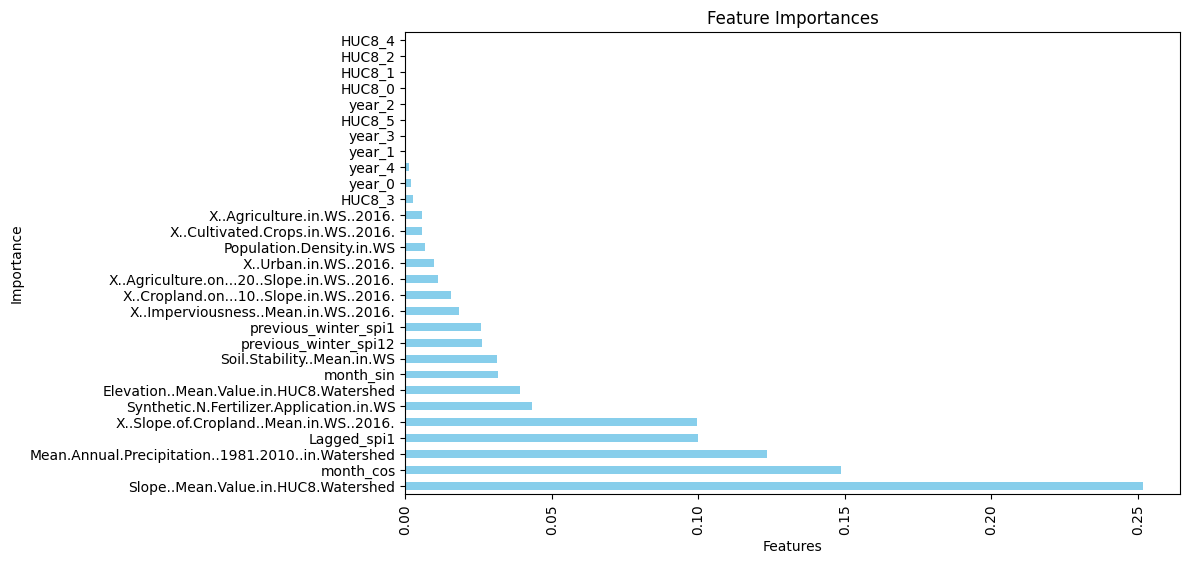

In [ ]:
#Visualizing it
import matplotlib.pyplot as plt
import pandas as pd

# Plotting the feature importances
plt.figure(figsize=(10, 6))  # Set the figure size
feature_imp.plot(kind='barh', color='skyblue')  # Create a vertical bar chart
plt.title('Feature Importances')  # Title of the plot
plt.xlabel('Features')  # Label for the x-axis
plt.ylabel('Importance')  # Label for the y-axis
plt.xticks(rotation=90)  # Rotate the x-axis labels for better readability
plt.show()